In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib as mpl
from copy import deepcopy

### Import data

In [2]:
label1 = 'overall'
label2 = 'potential'
label3 = 'overall'
label4 = 'value_eur'
k = 3

In [3]:
data = pd.read_csv('clustering-datasets.csv')
data2 = pd.read_csv('clustering-datasets2.csv')

In [4]:
data

,overall,potential
0,94,94
1,93,93
2,92,92
3,91,93
4,91,91
...,...,...
18273,48,56
18274,48,56
18275,48,56
18276,48,54


In [5]:
data2

,overall,value_eur
0,94,95500000
1,93,58500000
2,92,105500000
3,91,77500000
4,91,90000000
...,...,...
18273,48,40000
18274,48,40000
18275,48,40000
18276,48,40000


In [6]:
data.describe()

,overall,potential
count,18278.000000,18278.000000
mean,66.244994,71.546887
std,6.949953,6.139669
min,48.000000,49.000000
25%,62.000000,67.000000
50%,66.000000,71.000000
75%,71.000000,75.000000
max,94.000000,95.000000


In [7]:
data2.describe()

,overall,value_eur
count,18278.000000,1.827800e+04
mean,66.244994,2.484038e+06
std,6.949953,5.585481e+06
min,48.000000,0.000000e+00
25%,62.000000,3.250000e+05
50%,66.000000,7.000000e+05
75%,71.000000,2.100000e+06
max,94.000000,1.055000e+08


### Check for the missing values

In [8]:
missing_values = data.isnull().sum()
missing_values

overall      0
potential    0
dtype: int64

In [9]:
missing_values2 = data2.isnull().sum()
missing_values2

overall      0
value_eur    0
dtype: int64

In [10]:
def boxPlot(idx1, idx2, data):
    mpl.rcParams['figure.dpi'] = 100
    plt.figure(figsize=(60, 60))
    f, axes = plt.subplots(1, 2)
    sns.boxplot(y=data[idx1], ax=axes[0])
    sns.boxplot(y=data[idx2], ax=axes[1])
    plt.subplots_adjust(wspace=1)

<Figure size 6000x6000 with 0 Axes>

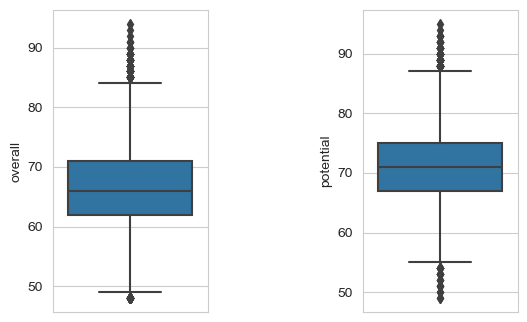

In [11]:
boxPlot(label1, label2, data)

<Figure size 6000x6000 with 0 Axes>

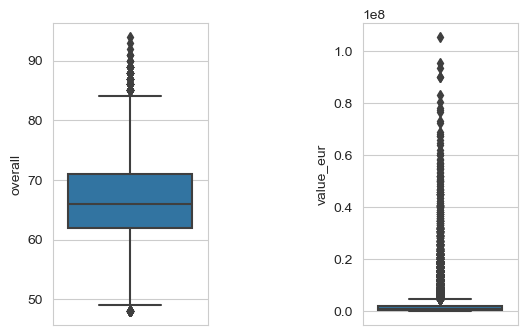

In [12]:
boxPlot(label3, label4, data2)

#### Formula to find out upper limit and lower limit from Outliers

In [13]:
def setbound(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    print(Q1, Q3)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#### Get the outliers data

In [14]:
def getOutlierData(data, mainData):
    lowerbound,upperbound = setbound(data)
    return mainData[(data < lowerbound) | (data > upperbound)]

#### Drop the outliers data

In [15]:
def outliering(idx1, idx2, mainData):
    while True:
        lowerbound,upperbound = setbound(mainData[idx1])
        res1 = getOutlierData(mainData[idx1], mainData)

        lowerbound,upperbound = setbound(mainData[idx2])
        res2 = getOutlierData(mainData[idx2], mainData)
        
        res = pd.concat([res1,res2]).drop_duplicates()
        res = res.index

        print('Total Outliers = ',len(res))
        print('=== The Outliers ===')
        print(res)    
        mainData.drop(res, inplace=True)

        if(len(res)==0):
            break
    print("BLOXPOT AFTER OUTLIERING")
    boxPlot(idx1, idx2, mainData)
    return mainData

62.0 71.0
62.0 71.0
67.0 75.0
67.0 75.0
Total Outliers =  94
=== The Outliers ===
Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,    10,
               11,    14,    16,    23,    24,    26,    27,    29,    40,
               42,    43,    44,    55,    56,    58,    60,    62,    64,
               73,    74,    75,    76,    80,    85,    86,    87,    96,
            18235, 18237, 18238, 18240, 18241, 18242, 18247, 18249, 18256,
            18258, 18260, 18262, 18264, 18271, 18272, 18273, 18276, 18277,
              108,   110,   111,   116,   157,   158,   162,   237,   238,
              329,   332,   411,   412,   568,   569,   571,   753,   754,
              992,  1254,  1255,  1257,  1615,  2121,  2122,  3288,  4041,
             4756, 17580, 17777, 17945, 17946, 18064, 18065, 18164, 18165,
            18167, 18230, 18232, 18233],
           dtype='int64')
62.0 71.0
62.0 71.0
67.0 75.0
67.0 75.0
Total Outliers =  49
=== The Outliers ===
Int64Index([    5, 

<Figure size 6000x6000 with 0 Axes>

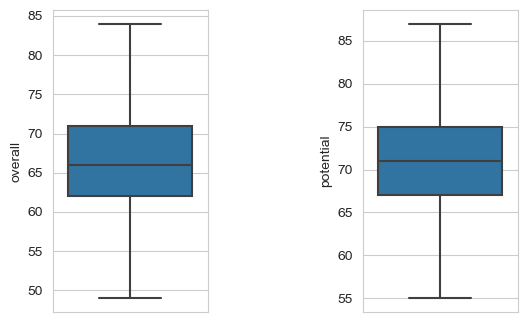

In [16]:
newData = outliering(label1, label2, data)

62.0 71.0
62.0 71.0
325000.0 2100000.0
325000.0 2100000.0
Total Outliers =  413
=== The Outliers ===
Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,
            ...
            3288, 3290, 3291, 3297, 3301, 3304, 3306, 4042, 4044, 4045],
           dtype='int64', length=413)
62.0 70.0
62.0 70.0
325000.0 1800000.0
325000.0 1800000.0
Total Outliers =  302
=== The Outliers ===
Int64Index([   5,   33,   38,   50,   51,   63,   81,   91,   93,   94,
            ...
            3341, 3342, 3354, 3365, 4041, 4043, 4048, 4049, 4050, 4058],
           dtype='int64', length=302)
62.0 70.0
62.0 70.0
312500.0 1600000.0
312500.0 1600000.0
Total Outliers =  256
=== The Outliers ===
Int64Index([  83,  107,  119,  146,  148,  150,  152,  168,  178,  183,
            ...
            4052, 4056, 4057, 4060, 4061, 4070, 4756, 4758, 4759, 4769],
           dtype='int64', length=256)
62.0 70.0
62.0 70.0
300000.0 1500000.0
300000.0 1500000.0
Total Outliers =  222
=== The Outliers ===

<Figure size 6000x6000 with 0 Axes>

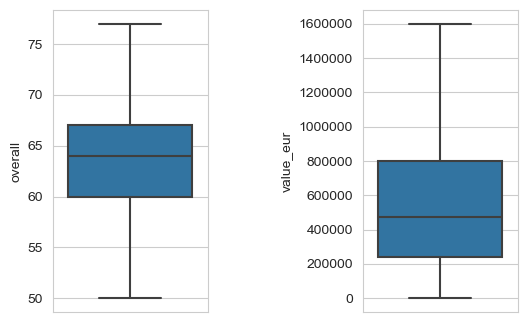

In [17]:
newData2 = outliering(label3, label4, data2)

Text(0, 0.5, 'potential')

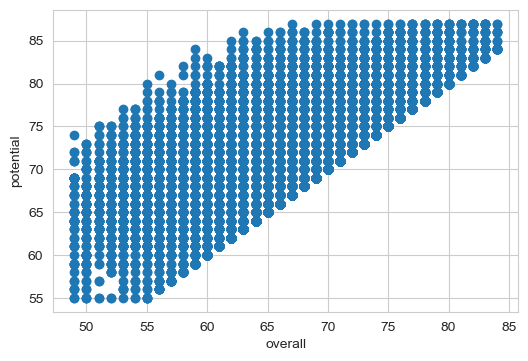

In [18]:
plt.scatter(newData[label1], newData[label2])
plt.xlabel(label1)
plt.ylabel(label2)

Text(0, 0.5, 'value_eur')

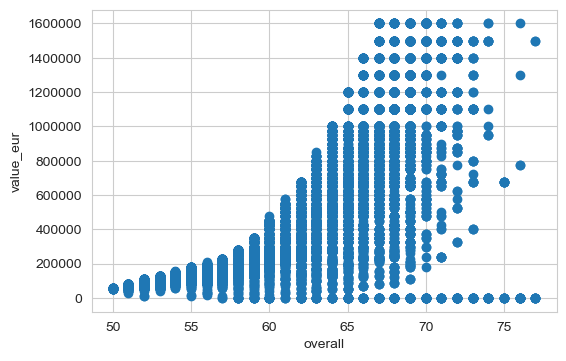

In [19]:
plt.scatter(newData2[label3], newData2[label4])
plt.xlabel(label3)
plt.ylabel(label4)

#### Function to generate centroids

In [20]:
def generateCentroids(k, data1, data2):
    # Randomize value from 0 until max of data depend on size of k
    xCentroids = np.random.randint(np.min(data1), np.max(data1), size=k)
    yCentroids = np.random.randint(np.min(data2), np.max(data2), size=k) 

    # Merge X and Y Centroids
    centroids = np.array(list(zip(xCentroids, yCentroids)))
    centroids = sorted(centroids, key=lambda x:x[:][0], reverse=False)
    centroids = np.array(centroids)
    
    return centroids, xCentroids, yCentroids

#### Function to plot initial centroids

In [21]:
def funPlot(data1, data2, cenX, cenY):
    plt.scatter(data1, data2, c='#050505', s=7)
    plt.scatter(cenX, cenY, marker='*', s=200, c='g')

#### Euclidean Distance Formula

In [22]:
def euclideanDistance(data, centroids, ax=1):
    return np.linalg.norm(data - centroids, axis=ax)

## Lets make some new K-Means code 

In [23]:
colmap = {0: 'r',  1: 'purple', 2: 'pink', 3: 'gray', 4: 'cyan', 5: 'yellow'}

In [24]:
# Assign cluster each data
def assignment(newData, col1, col2, centroids):
    for i in range(len(centroids)):
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        newData['distance_from_{}'.format(i)] = (
            np.sqrt(
                (newData[col1] - centroids[i][0]) ** 2
                + (newData[col2] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in range(len(centroids))]
    newData['closest'] = newData.loc[:, centroid_distance_cols].idxmin(axis=1)
    newData['closest'] = newData['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    newData['color'] = newData['closest'].map(lambda x: colmap[x])
    return newData

In [25]:
# update Centroids
def update(centroids, data, col1, col2):
    for i in range(len(centroids)):
        centroids[i][0] = np.mean(data[data['closest'] == i][col1])
        centroids[i][1] = np.mean(data[data['closest'] == i][col2])
    return centroids

In [26]:
def newKmeans(k, data, col1,col2):
    centroidz,x,y = generateCentroids(k,data[col1],data[col2])
    funPlot(data[col1],data[col2],x,y)
    data = assignment(data, col1,col2, centroidz)
    while True:
        old_centroids = data['closest'].copy(deep=True)
        centroidz = update(centroidz,data,col1,col2)
        data = assignment(data, col1, col2, centroidz)
        if old_centroids.equals(data['closest']):
            break
    return centroidz, data    

In [27]:
def newPlotKmeans(data, col1, col2, centroids):
    plt.scatter(data[col1], data[col2], color=data['color'])
    for i in range(len(centroids)):
        plt.scatter(centroids[i][0], centroids[i][1], marker='*', s=100, c='#050505')
    plt.show()

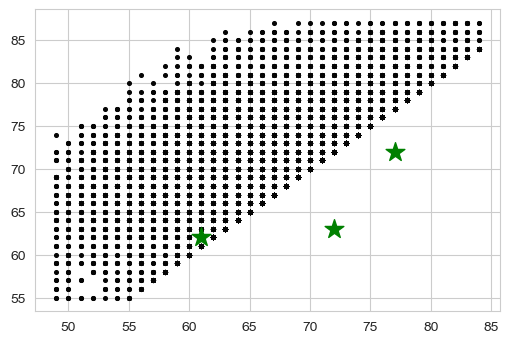

In [28]:
cen, new = newKmeans(k,newData.copy(), label1,label2)

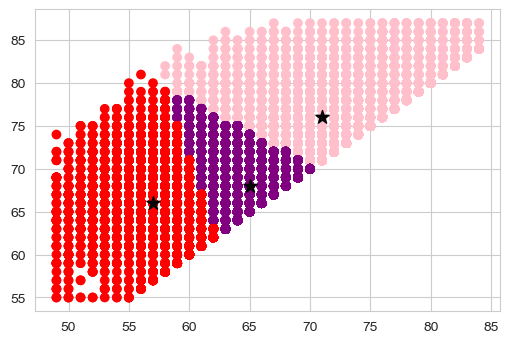

In [29]:
newPlotKmeans(new,label1,label2,cen)

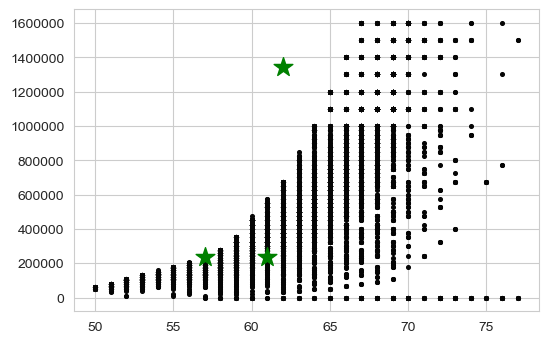

In [30]:
cen2, new2 = newKmeans(k,newData2.copy(), label3,label4)

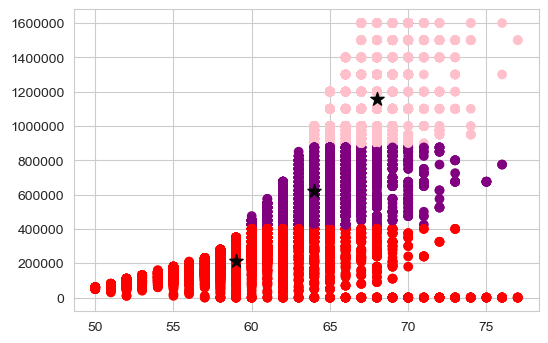

In [31]:
newPlotKmeans(new2,label3,label4,cen2)

#### Convert data to array

In [32]:
npData = np.array(newData)
npData2 = np.array(newData2)

#### Formula to update centroids based on the data

In [33]:
def updateCentroids(idx, clusters, data):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == idx])
    return points

## K-Means Function

In [34]:
def kMeans(k, data, col1, col2):
    # Generate centroids
    centroids, x, y = generateCentroids(k,data[:,0],data[:,1])
    
    # First Plot
    funPlot(data[:,0],data[:,1],x,y)
    
    # Set all cluster to 0
    clusters = np.zeros(len(data))
    clusters
    
    # assign old centroid as 0
    oldCentroid = np.zeros(centroids.shape)
    print("INITIALIZE CENTROIDS ", oldCentroid)
    
    # Error func. - Distance between new centroids and old centroids
    error = euclideanDistance(centroids, oldCentroid,None)
    print("INITIALIZE ERROR ", error)
    
    idx=0
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = euclideanDistance(data[i], centroids)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        # Storing the old centroid values
        oldCentroid = deepcopy(centroids)
        
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = updateCentroids(i,clusters, data)
            centroids[i] = np.mean(points, axis=0)
        error = euclideanDistance(centroids, oldCentroid, None)
        
    return centroids, clusters

In [35]:
def finalPlot(clusters, data, centroids):
    colors = ['r', 'gray', 'cyan','b', 'y', 'c', 'm', 'pink']
    fig, ax = plt.subplots()
    for i in range(len(centroids)):
            points = updateCentroids(i, clusters, data)
            ax.scatter(points[:, 0], points[:, 1], c=colors[i])

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='#050505')

### The clustering result

INITIALIZE CENTROIDS  [[0. 0.]
 [0. 0.]
 [0. 0.]]
INITIALIZE ERROR  179.91942641082423


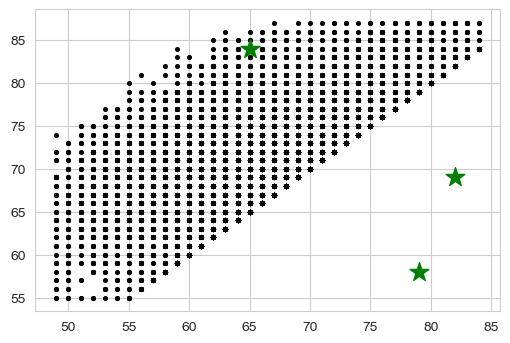

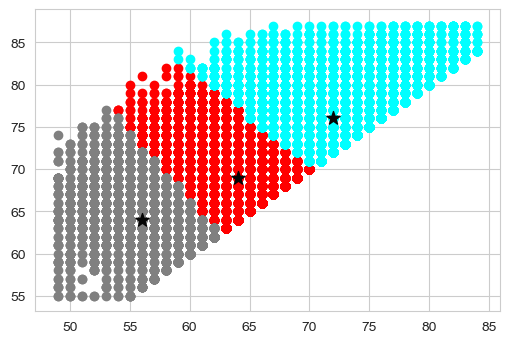

In [36]:
lastCentroids, clusters = kMeans(k, npData, label1, label2)
finalPlot(clusters, npData, lastCentroids)

INITIALIZE CENTROIDS  [[0. 0.]
 [0. 0.]
 [0. 0.]]
INITIALIZE ERROR  1548462.192421888


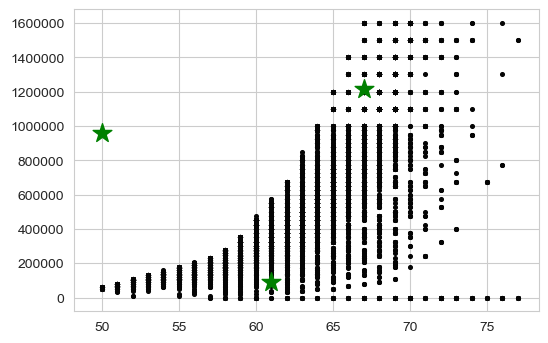

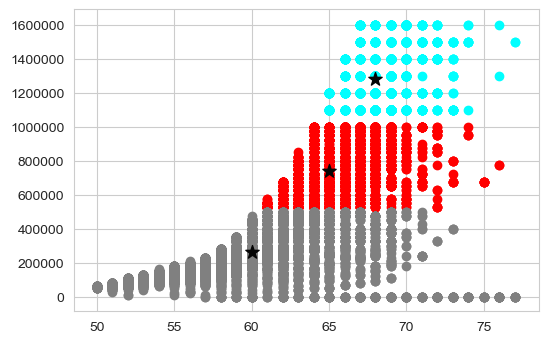

In [37]:
lastCentroids2, clusters2 = kMeans(k, npData2, label3, label4)
finalPlot(clusters2, npData2, lastCentroids2)

In [38]:
lastCentroids

array([[64, 69],
       [56, 64],
       [72, 76]])

In [39]:
lastCentroids2

array([[     65,  741005],
       [     60,  260775],
       [     68, 1282060]])

In [40]:
clusters

array([2., 2., 2., ..., 1., 1., 1.])

In [41]:
clusters2

array([1., 2., 1., ..., 1., 1., 1.])

#### Evaluatin model using Silhouette Coefficient

In [42]:
print('Value of the cluster : ')
print(silhouette_samples(npData, clusters, metric='euclidean')*100)
print()
print('Mean of the cluster value : ')
print(np.mean(silhouette_samples(npData, clusters, metric='euclidean'))*100)

Value of the cluster : 
[40.50278831 40.50278831 41.40902274 ... 41.10068622 39.5698761
 39.5698761 ]

Mean of the cluster value : 
36.19506464795887


In [43]:
print('Value of the cluster : ')
print(silhouette_samples(npData2, clusters2, metric='euclidean')*100)
print()
print('Mean of the cluster value : ')
print(np.mean(silhouette_samples(npData2, clusters2, metric='euclidean'))*100)

Value of the cluster : 
[64.80265181 69.04707656 64.80265181 ... 68.97481274 68.97481274
 68.97481274]

Mean of the cluster value : 
58.88674671047917


## Conclusion

From this experiment, we can conclude that <b>experiment 1</b> that evaluate using <i>silhouette coefficient</i> show how good the cluster value for each data to thoose centroid is 35 %, while <b>experiment 2</b> give value that I think it's big enough that is 57%

<p>Copyright &copy; 2020 <a href=https://www.linkedin.com/in/pratamays/>Pratama Yoga Santosa</a> </p>